# Optimierungsanalyse

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

In [10]:
# Train: Features + Target in einer Datei
train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")
train_X = train_df.drop(columns=["AdoptionSpeed"])
train_y = train_df["AdoptionSpeed"].astype(int).values

# Valid: Features und Target getrennt
valid_X = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
# Nur die Target-Spalte laden
valid_y = pd.read_csv("Data/preprocessed/valid_target.csv")["AdoptionSpeed"].astype(int).values.ravel()

# Test: Features und Target getrennt
test_X = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
test_y = pd.read_csv("Data/preprocessed/test_target.csv")["AdoptionSpeed"].astype(int).values.ravel()


## 1. Random Search

In [11]:
# Kombiniere Train + Valid (für RandomizedSearchCV)
X_train = pd.concat([train_X, valid_X], axis=0)
y_train = np.concatenate([train_y, valid_y], axis=0)

In [12]:
# Modell
xgb = XGBClassifier(
    objective="multi:softmax",   # Multiklassifikation
    num_class=len(np.unique(y_train)),  # Anzahl Klassen automatisch bestimmen
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

In [13]:
# Hyperparameter-Suchraum
param_dist = {
    "max_depth": np.arange(3, 11),
    "learning_rate": np.linspace(0.01, 0.3, 30),
    "subsample": np.linspace(0.5, 1.0, 6),
    "n_estimators": np.arange(100, 1001, 100),
}

In [14]:
X_train = X_train.drop(columns=["PetID"])
valid_X = valid_X.drop(columns=["PetID"])
test_X  = test_X.drop(columns=["PetID"])


In [15]:
# === 2. XGBoost Modell ===
xgb= xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring="accuracy",
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


NameError: name 'param_dist' is not defined

In [ ]:
# Alle Object-/String-Spalten finden
object_cols = X_train.select_dtypes(include=["object", "string"]).columns

# Object-Spalten entfernen
X_train_clean = X_train.drop(columns=object_cols)
valid_X_clean = valid_X.drop(columns=object_cols)
test_X_clean  = test_X.drop(columns=object_cols)

# Kontrolle
print("Train shape:", X_train_clean.shape)
print("Valid shape:", valid_X_clean.shape)
print("Test shape:", test_X_clean.shape)


Train shape: (16120, 21)
Valid shape: (2845, 21)
Test shape: (2845, 21)


In [ ]:
import xgboost as xgb

# DMatrix für XGBoost erstellen
dtrain = xgb.DMatrix(X_train_clean, label=y_train)
dvalid = xgb.DMatrix(valid_X_clean, label=valid_y)

# Parameter für XGBoost
params = {
    "objective": "multi:softmax",
    "num_class": len(np.unique(y_train)),
    "eval_metric": "mlogloss",
    **best_params  # aus RandomizedSearchCV
}

evals = [(dtrain, "train"), (dvalid, "valid")]

# Training mit Early Stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

# Vorhersage auf Testset
dtest = xgb.DMatrix(test_X_clean)
preds = bst.predict(dtest)


[0]	train-mlogloss:1.60433	valid-mlogloss:1.60441
[1]	train-mlogloss:1.59949	valid-mlogloss:1.59968
[2]	train-mlogloss:1.59473	valid-mlogloss:1.59498
[3]	train-mlogloss:1.59020	valid-mlogloss:1.59055
[4]	train-mlogloss:1.58540	valid-mlogloss:1.58581
[5]	train-mlogloss:1.58072	valid-mlogloss:1.58113


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:55:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[6]	train-mlogloss:1.57627	valid-mlogloss:1.57673
[7]	train-mlogloss:1.57190	valid-mlogloss:1.57245
[8]	train-mlogloss:1.56734	valid-mlogloss:1.56794
[9]	train-mlogloss:1.56271	valid-mlogloss:1.56330
[10]	train-mlogloss:1.55813	valid-mlogloss:1.55873
[11]	train-mlogloss:1.55374	valid-mlogloss:1.55447
[12]	train-mlogloss:1.54939	valid-mlogloss:1.55019
[13]	train-mlogloss:1.54513	valid-mlogloss:1.54597
[14]	train-mlogloss:1.54095	valid-mlogloss:1.54181
[15]	train-mlogloss:1.53665	valid-mlogloss:1.53757
[16]	train-mlogloss:1.53249	valid-mlogloss:1.53344
[17]	train-mlogloss:1.52839	valid-mlogloss:1.52934
[18]	train-mlogloss:1.52438	valid-mlogloss:1.52536
[19]	train-mlogloss:1.52027	valid-mlogloss:1.52128
[20]	train-mlogloss:1.51628	valid-mlogloss:1.51736
[21]	train-mlogloss:1.51241	valid-mlogloss:1.51351
[22]	train-mlogloss:1.50825	valid-mlogloss:1.50948
[23]	train-mlogloss:1.50421	valid-mlogloss:1.50544
[24]	train-mlogloss:1.50021	valid-mlogloss:1.50140
[25]	train-mlogloss:1.49637	valid-m

In [ ]:
# Beste Parameter
print("Beste Parameter:", random_search.best_params_)
print("Bester CV-Score:", random_search.best_score_)

In [ ]:
# Finale Bewertung auf Test
best_model = random_search.best_estimator_
y_pred = best_model.predict(test_X)

print("Accuracy (Test):", accuracy_score(test_y, y_pred))
print("Classification Report (Test):\n", classification_report(test_y, y_pred))

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier

# ======================
# 1. Daten laden
# ======================
train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")
X_train = train_df.drop(columns=["AdoptionSpeed"])
y_train = train_df["AdoptionSpeed"].astype(int).values

valid_X = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
valid_y = pd.read_csv("Data/preprocessed/valid_target.csv")["AdoptionSpeed"].astype(int).values

test_X = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
test_y = pd.read_csv("Data/preprocessed/test_target.csv")["AdoptionSpeed"].astype(int).values

# ======================
# 2. Object-Spalten entfernen
# ======================
object_cols = X_train.select_dtypes(include=["object", "string"]).columns
X_train_clean = X_train.drop(columns=object_cols)
valid_X_clean = valid_X.drop(columns=object_cols)
test_X_clean  = test_X.drop(columns=object_cols)

# ======================
# 3. RandomizedSearchCV für Hyperparameter
# ======================
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Beispielparameter-Raum (anpassen)
param_dist = {
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 300, 500],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring="accuracy",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_clean, y_train)

best_params = random_search.best_params_
print("Beste Parameter:", best_params)

# ======================
# 4. Bestes Modell mit xgb.train + Early Stopping
# ======================
# DMatrix erstellen
dtrain = xgb.DMatrix(X_train_clean, label=y_train)
dvalid = xgb.DMatrix(valid_X_clean, label=valid_y)
dtest  = xgb.DMatrix(test_X_clean)

# Parameter für xgb.train vorbereiten
params = {
    "objective": "multi:softmax",
    "num_class": len(np.unique(y_train)),
    "eval_metric": "mlogloss",
    **best_params
}

evals = [(dtrain, "train"), (dvalid, "valid")]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

# ======================
# 5. Vorhersage & Evaluation
# ======================
preds = bst.predict(dtest)

accuracy = accuracy_score(test_y, preds)
f1 = f1_score(test_y, preds, average="weighted")

print("Test Accuracy:", accuracy)
print("Test F1:", f1)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier

# ======================
# 1. Daten laden
# ======================
train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")
X_train = train_df.drop(columns=["AdoptionSpeed"])
y_train = train_df["AdoptionSpeed"].astype(int).values

valid_X = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
valid_y = pd.read_csv("Data/preprocessed/valid_target.csv")["AdoptionSpeed"].astype(int).values

test_X = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
test_y = pd.read_csv("Data/preprocessed/test_target.csv")["AdoptionSpeed"].astype(int).values

# ======================
# 2. Object-Spalten entfernen
# ======================
object_cols = X_train.select_dtypes(include=["object", "string"]).columns
X_train_clean = X_train.drop(columns=object_cols)
valid_X_clean = valid_X.drop(columns=object_cols)
test_X_clean  = test_X.drop(columns=object_cols)

# ======================
# 3. RandomizedSearchCV für ausgewählte Hyperparameter
# ======================
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

param_dist = {
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "n_estimators": [100, 200, 300, 500]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring="accuracy",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_clean, y_train)

best_params = random_search.best_params_
print("Beste Parameter:", best_params)

# ======================
# 4. Bestes Modell mit xgb.train + Early Stopping
# ======================
dtrain = xgb.DMatrix(X_train_clean, label=y_train)
dvalid = xgb.DMatrix(valid_X_clean, label=valid_y)
dtest  = xgb.DMatrix(test_X_clean)

# Parameter vorbereiten (early_stopping_rounds wird hier nicht in params übergeben!)
params = {
    "objective": "multi:softmax",
    "num_class": len(np.unique(y_train)),
    "eval_metric": "mlogloss",
    "max_depth": best_params["max_depth"],
    "learning_rate": best_params["learning_rate"],
    "subsample": best_params["subsample"]
}

num_boost_round = best_params["n_estimators"]
early_stopping_rounds = 30  # Hier gezielt gesetzt

evals = [(dtrain, "train"), (dvalid, "valid")]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=True
)

# ======================
# 5. Vorhersage & Evaluation
# ======================
preds = bst.predict(dtest)

accuracy = accuracy_score(test_y, preds)
f1 = f1_score(test_y, preds, average="weighted")

print("Test Accuracy:", accuracy)
print("Test F1:", f1)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:57:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Beste Parameter: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
[0]	train-mlogloss:1.55158	valid-mlogloss:1.57061
[1]	train-mlogloss:1.50842	valid-mlogloss:1.54281
[2]	train-mlogloss:1.47339	valid-mlogloss:1.52276
[3]	train-mlogloss:1.44512	valid-mlogloss:1.50792
[4]	train-mlogloss:1.41739	valid-mlogloss:1.49283
[5]	train-mlogloss:1.39469	valid-mlogloss:1.48297
[6]	train-mlogloss:1.37314	valid-mlogloss:1.47396
[7]	train-mlogloss:1.35310	valid-mlogloss:1.46573
[8]	train-mlogloss:1.33382	valid-mlogloss:1.45896
[9]	train-mlogloss:1.31719	valid-mlogloss:1.45359
[10]	train-mlogloss:1.30261	valid-mlogloss:1.44688
[11]	train-mlogloss:1.28727	valid-mlogloss:1.44168
[12]	train-mlogloss:1.27282	valid-mlogloss:1.43670
[13]	train-mlogloss:1.25907	valid-mlogloss:1.43324
[14]	train-mlogloss:1.24500	valid-mlogloss:1.42892
[15]	train-mlogloss:1.23161	valid-mlogloss:1.42504
[16]	train-mlogloss:1.22087	valid-mlogloss:1.42136
[17]	train-mlogloss:1.20971	valid-mlogloss:1.418

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier

# ======================
# 1. Daten laden
# ======================
train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")
X_train = train_df.drop(columns=["AdoptionSpeed"])
y_train = train_df["AdoptionSpeed"].astype(int).values

valid_X = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
valid_y = pd.read_csv("Data/preprocessed/valid_target.csv")["AdoptionSpeed"].astype(int).values

test_X = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
test_y = pd.read_csv("Data/preprocessed/test_target.csv")["AdoptionSpeed"].astype(int).values

# ======================
# 2. Object-Spalten entfernen
# ======================
object_cols = X_train.select_dtypes(include=["object", "string"]).columns
X_train_clean = X_train.drop(columns=object_cols)
valid_X_clean = valid_X.drop(columns=object_cols)
test_X_clean  = test_X.drop(columns=object_cols)

# ======================
# 3. RandomizedSearchCV für ausgewählte Hyperparameter
# ======================
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

param_dist = {
    "max_depth": [2, 4, 6, 8, 10, 12, 14, 16],
    "learning_rate": [0.01, 0.02, 0.05, 0.1, 0.09],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "n_estimators": [100, 300, 500, 800, 1000]
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring="accuracy",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_clean, y_train)

best_params = random_search.best_params_
print("Beste Parameter:", best_params)

# ======================
# 4. Bestes Modell mit xgb.train + Early Stopping
# ======================
dtrain = xgb.DMatrix(X_train_clean, label=y_train)
dvalid = xgb.DMatrix(valid_X_clean, label=valid_y)
dtest  = xgb.DMatrix(test_X_clean)

# Parameter vorbereiten (early_stopping_rounds wird hier nicht in params übergeben!)
params = {
    "objective": "multi:softmax",
    "num_class": len(np.unique(y_train)),
    "eval_metric": "mlogloss",
    "max_depth": best_params["max_depth"],
    "learning_rate": best_params["learning_rate"],
    "subsample": best_params["subsample"]
}

num_boost_round = best_params["n_estimators"]
early_stopping_rounds = 30  # Hier gezielt gesetzt

evals = [(dtrain, "train"), (dvalid, "valid")]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=True
)

# ======================
# 5. Vorhersage & Evaluation
# ======================
preds = bst.predict(dtest)

accuracy = accuracy_score(test_y, preds)
f1 = f1_score(test_y, preds, average="weighted")

print("Test Accuracy:", accuracy)
print("Test F1:", f1)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Beste Parameter: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 14, 'learning_rate': 0.02}
[0]	train-mlogloss:1.59323	valid-mlogloss:1.60357
[1]	train-mlogloss:1.57779	valid-mlogloss:1.59795
[2]	train-mlogloss:1.56276	valid-mlogloss:1.59241
[3]	train-mlogloss:1.54771	valid-mlogloss:1.58688
[4]	train-mlogloss:1.53276	valid-mlogloss:1.58157
[5]	train-mlogloss:1.51821	valid-mlogloss:1.57625
[6]	train-mlogloss:1.50369	valid-mlogloss:1.57097
[7]	train-mlogloss:1.48932	valid-mlogloss:1.56607
[8]	train-mlogloss:1.47514	valid-mlogloss:1.56125
[9]	train-mlogloss:1.46216	valid-mlogloss:1.55653
[10]	train-mlogloss:1.44933	valid-mlogloss:1.55212
[11]	train-mlogloss:1.43587	valid-mlogloss:1.54774
[12]	train-mlogloss:1.42261	valid-mlogloss:1.54367
[13]	train-mlogloss:1.41057	valid-mlogloss:1.53984
[14]	train-mlogloss:1.39822	valid-mlogloss:1.53585
[15]	train-mlogloss:1.38595	valid-mlogloss:1.53193
[16]	train-mlogloss:1.37359	valid-mlogloss:1.52790
[17]	train-mlogloss:1.36150	valid-mlogloss:1.5

### RandomSearch Neu

Train classes: [0 1 2]
Valid classes: [0 1 2]
Test classes: [0 1 2]
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01}
Best CV score: 0.5170183798502382
[0]	train-mlogloss:1.09655	valid-mlogloss:1.09728
[1]	train-mlogloss:1.09464	valid-mlogloss:1.09607
[2]	train-mlogloss:1.09269	valid-mlogloss:1.09473
[3]	train-mlogloss:1.09080	valid-mlogloss:1.09357
[4]	train-mlogloss:1.08898	valid-mlogloss:1.09231
[5]	train-mlogloss:1.08709	valid-mlogloss:1.09101
[6]	train-mlogloss:1.08533	valid-mlogloss:1.08984
[7]	train-mlogloss:1.08356	valid-mlogloss:1.08870
[8]	train-mlogloss:1.08178	valid-mlogloss:1.08750
[9]	train-mlogloss:1.07994	valid-mlogloss:1.08626
[10]	train-mlogloss:1.07817	valid-mlogloss:1.08513
[11]	train-mlogloss:1.07648	valid-mlogloss:1.08411
[12]	train-mlogloss:1.07485	valid-mlogloss:1.08310
[13]	train-mlogloss:1.07312	valid-mlogloss:1.08195
[14]	train-mlogloss:1.07134	valid-mlogloss:1.08097
[15]	train-mlogloss:1.06982	valid-mlogloss:1.08005
[16]	train-mlogloss:1.06816	valid-mlogloss:1.07903
[17]	train-ml

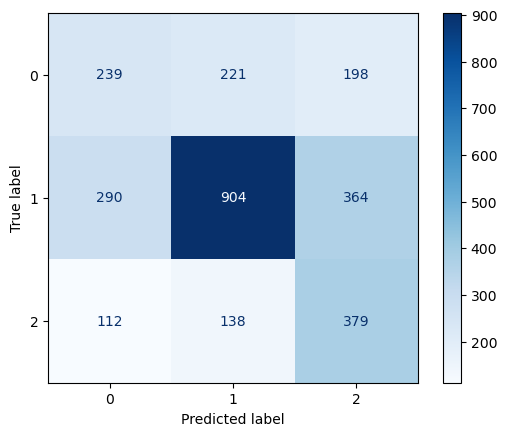

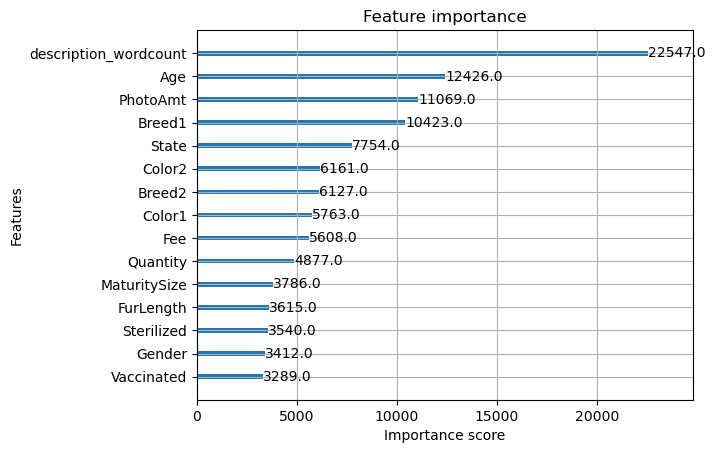

In [ ]:
# === 0. Imports ===
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt

# === 1. CSVs laden ===
X_train_res = pd.read_csv("Data/preprocessed/X_train_res.csv")
y_train_res = pd.read_csv("Data/preprocessed/y_train_res.csv")['target']

X_valid = pd.read_csv("Data/preprocessed/X_valid_enc.csv")
y_valid = pd.read_csv("Data/preprocessed/y_valid.csv")['target']

X_test = pd.read_csv("Data/preprocessed/X_test_enc.csv")
y_test = pd.read_csv("Data/preprocessed/y_test.csv")['target']

# --- Prüfen, dass alle Klassen enthalten sind ---
print("Train classes:", np.unique(y_train_res))
print("Valid classes:", np.unique(y_valid))
print("Test classes:", np.unique(y_test))

# === 3. Randomized Search über sklearn API (ohne early stopping) ===
param_dist = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}

xgb_skl = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_skl,
    param_distributions=param_dist,
    n_iter=20,
    scoring="accuracy",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)
print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

# === 4. Finaler XGBoost-Fit mit Early Stopping über DMatrix ===
# DMatrix erstellen
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest  = xgb.DMatrix(X_test, label=y_test)

# Beste Parameter aus RandomizedSearchCV übernehmen
best_params = random_search.best_params_
xgb_params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'seed': 42,
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'subsample': best_params['subsample']
}

num_boost_round = best_params['n_estimators']

evals = [(dtrain, 'train'), (dvalid, 'valid')]
bst = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# === 5. Test-Set Vorhersage ===
y_pred = bst.predict(dtest)
print("\nXGBoost Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# === 6. Confusion Matrix ===
labels_all = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.show()

# === 7. Feature Importance ===
xgb.plot_importance(bst, importance_type='weight', max_num_features=15)
plt.show()


### GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb

# === 1. Parameter Grid definieren ===
param_grid = {
    "n_estimators": [50, 100, 200, 500, 1000, 600, 700, 800, 900, 1000],
    "max_depth": [3, 4, 5,6,7,8,9,10],
    "learning_rate": [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.3],
    "subsample": [0.8, 0.6, 0.7, 0.5, 1.0]
}

# === 2. XGBoost Modell ===
xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

# === 3. Grid Search ===
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# === 4. Bestes Modell extrahieren ===
best_model = grid_search.best_estimator_

# === 5. Evaluation auf Test-Set ===
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 6. Confusion Matrix ===
labels_all = [0, 1, 2]  # deine drei Klassen
cm = confusion_matrix(y_test, y_pred, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.show()


NameError: name 'X_train_res' is not defined

[I 2025-09-09 10:22:00,703] A new study created in memory with name: no-name-8e8bce74-a795-4747-9ac2-2f1673faf1a5
c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-09 10:22:01,603] Trial 0 finished with value: 0.5156414762741652 and parameters: {'n_estimators': 410, 'max_depth': 3, 'learning_rate': 0.014494688716077701, 'subsample': 0.764532429454507}. Best is trial 0 with value: 0.5156414762741652.
c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-09 10:22:04,525] Trial 1 finished with value: 0.5230228471001758 and parameters: {'n_estimators': 699, 'max_dep

Best Trial Parameters: {'n_estimators': 904, 'max_depth': 7, 'learning_rate': 0.023074855251073702, 'subsample': 0.848967396784947}
Best Validation Accuracy: 0.5328646748681898

Test Accuracy: 0.5321616871704745

Test Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.42      0.39       658
           1       0.73      0.55      0.63      1558
           2       0.42      0.59      0.49       629

    accuracy                           0.53      2845
   macro avg       0.50      0.52      0.50      2845
weighted avg       0.58      0.53      0.54      2845



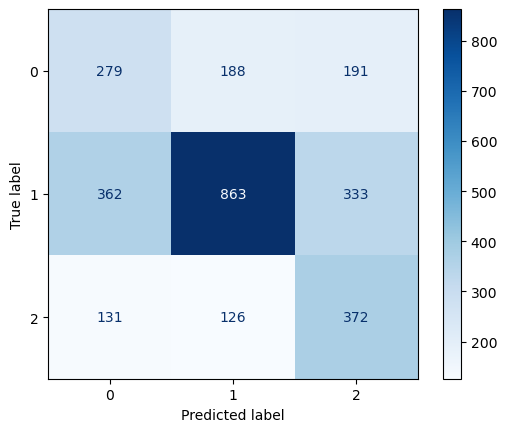

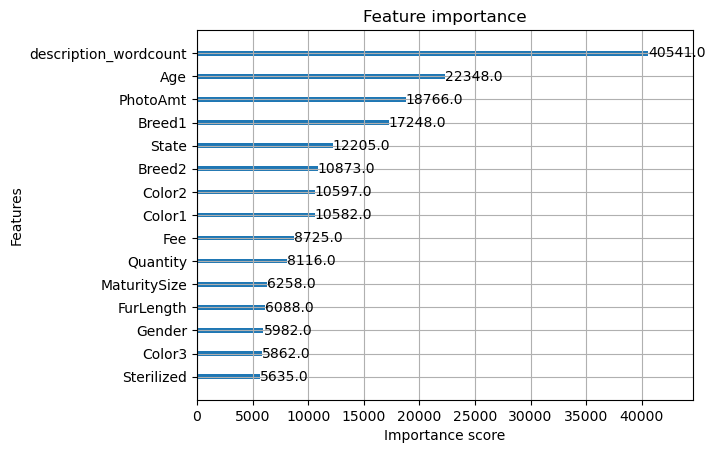

In [ ]:
# === 0. Imports ===
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import optuna
import matplotlib.pyplot as plt

# === 1. CSVs einlesen ===
X_train_res = pd.read_csv("Data/preprocessed/X_train_res.csv")
y_train_res = pd.read_csv("Data/preprocessed/y_train_res.csv")['target']

X_valid = pd.read_csv("Data/preprocessed/X_valid_enc.csv")
y_valid = pd.read_csv("Data/preprocessed/y_valid.csv")['target']

X_test = pd.read_csv("Data/preprocessed/X_test_enc.csv")
y_test = pd.read_csv("Data/preprocessed/y_test.csv")['target']

# === 2. Kategorische Spalten erkennen ===
cat_cols = X_train_res.select_dtypes(include=['object', 'category']).columns

# --- NaNs durch Platzhalter ersetzen ---
for col in cat_cols:
    X_train_res[col] = X_train_res[col].fillna('missing')
    X_valid[col] = X_valid[col].fillna('missing')
    X_test[col] = X_test[col].fillna('missing')

# --- Als Kategorie casten ---
for col in cat_cols:
    X_train_res[col] = X_train_res[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    X_test[col]  = X_test[col].astype('category')

# --- OrdinalEncoder ---
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_res[cat_cols] = oe.fit_transform(X_train_res[cat_cols])
X_valid[cat_cols] = oe.transform(X_valid[cat_cols])
X_test[cat_cols]  = oe.transform(X_test[cat_cols])

# === 3. Optuna Objective Funktion ===
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'objective': 'multi:softmax',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    return accuracy

# === 4. Optuna Study starten ===
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Trial Parameters:", study.best_trial.params)
print("Best Validation Accuracy:", study.best_value)

# === 5. Finaler Fit auf Trainingsset + Test Evaluation ===
best_params = study.best_trial.params
final_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    **best_params
)

final_model.fit(X_train_res, y_train_res)

# --- Vorhersage auf Testset ---
y_pred_test = final_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

# --- Confusion Matrix ---
labels_all = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred_test, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.show()

# --- Feature Importance ---
plot_importance(final_model, importance_type="weight", max_num_features=15)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# PCA auf Trainingsdaten
pca = PCA(n_components=0.80, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_res)

# Gesamterklärte Varianz
expl_var_ratio = pca.explained_variance_ratio_
print("Anzahl der gewählten Komponenten:", len(expl_var_ratio))
print("Kumulative erklärte Varianz:", np.cumsum(expl_var_ratio))

# Beitrag der ursprünglichen Features zu jeder Komponente (Loadings)
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(expl_var_ratio))],
                        index=X_train_res.columns)

# Absoluter Beitrag jedes Features über alle ausgewählten PCs
feature_importance = np.sum(np.abs(loadings), axis=1)
feature_importance = feature_importance.sort_values(ascending=False)

# Features, die am meisten zur erklärten Varianz beitragen
print("\nTop Features, die zur 80%-Varianz beitragen:")
print(feature_importance.head(15))

# Features, die am wenigsten beitragen
print("\nFeatures, die am wenigsten beitragen (könnten rausfallen):")
print(feature_importance.tail(15))


Anzahl der gewählten Komponenten: 3
Kumulative erklärte Varianz: [0.48657834 0.71121539 0.8534671 ]

Top Features, die zur 80%-Varianz beitragen:
Fee                      1.167226
description_wordcount    1.151921
Breed2                   1.053082
Breed1                   0.398815
Age                      0.058375
State                    0.056517
PhotoAmt                 0.015440
Color3                   0.004446
age_category             0.002296
Quantity                 0.002024
FurLength                0.001945
Color2                   0.001891
Color1                   0.001711
Dewormed                 0.001389
Vaccinated               0.001349
dtype: float64

Features, die am wenigsten beitragen (könnten rausfallen):
PhotoAmt        0.015440
Color3          0.004446
age_category    0.002296
Quantity        0.002024
FurLength       0.001945
Color2          0.001891
Color1          0.001711
Dewormed        0.001389
Vaccinated      0.001349
Sterilized      0.001308
MaturitySize    0.0

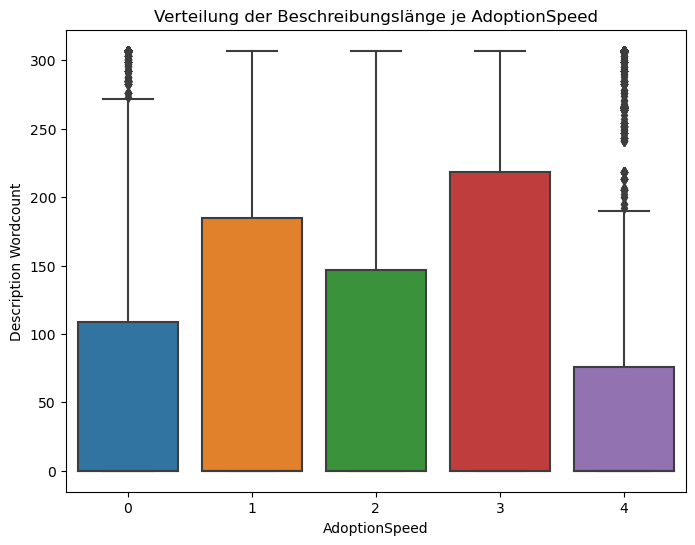

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Falls noch nicht geladen:
df = pd.read_csv("Data/preprocessed/combined_preprocessed.csv")

# Plot: description_wordcount je AdoptionSpeed
plt.figure(figsize=(8,6))
sns.boxplot(x='AdoptionSpeed', y='Breed2', data=df)
plt.xlabel("AdoptionSpeed")
plt.ylabel("Description Wordcount")
plt.title("Verteilung der Beschreibungslänge je AdoptionSpeed")
plt.show()


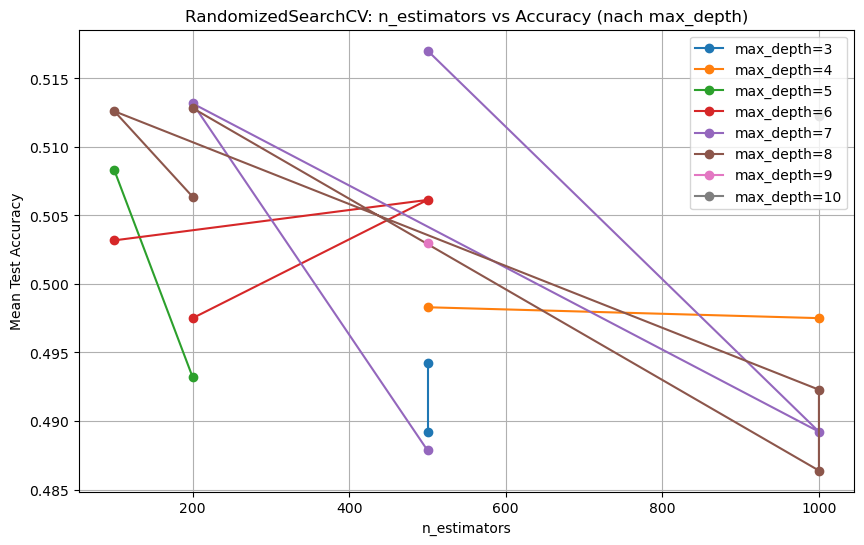

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ergebnisse in DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Beispiel: Accuracy über n_estimators, getrennt nach max_depth
plt.figure(figsize=(10, 6))

for depth in sorted(results['param_max_depth'].unique()):
    subset = results[results['param_max_depth'] == depth]
    plt.plot(
        subset['param_n_estimators'],
        subset['mean_test_score'],
        marker='o',
        label=f'max_depth={depth}'
    )

plt.title('RandomizedSearchCV: n_estimators vs Accuracy (nach max_depth)')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


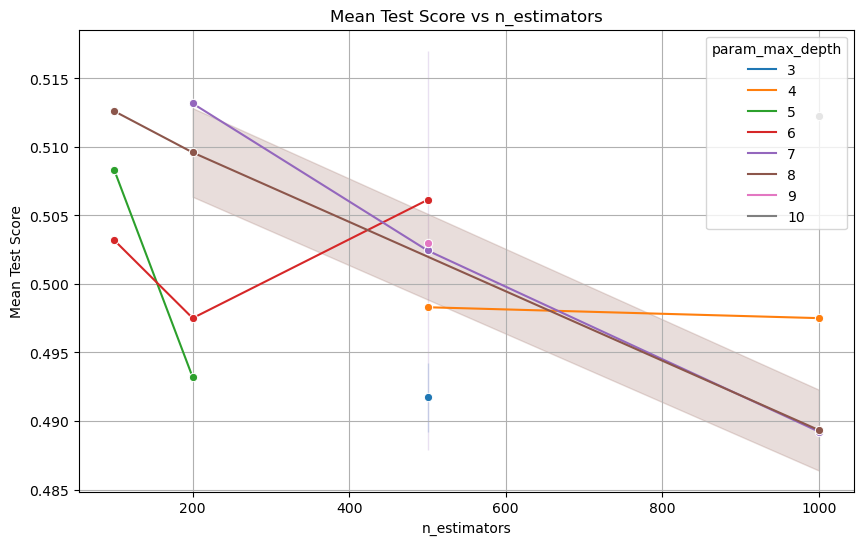

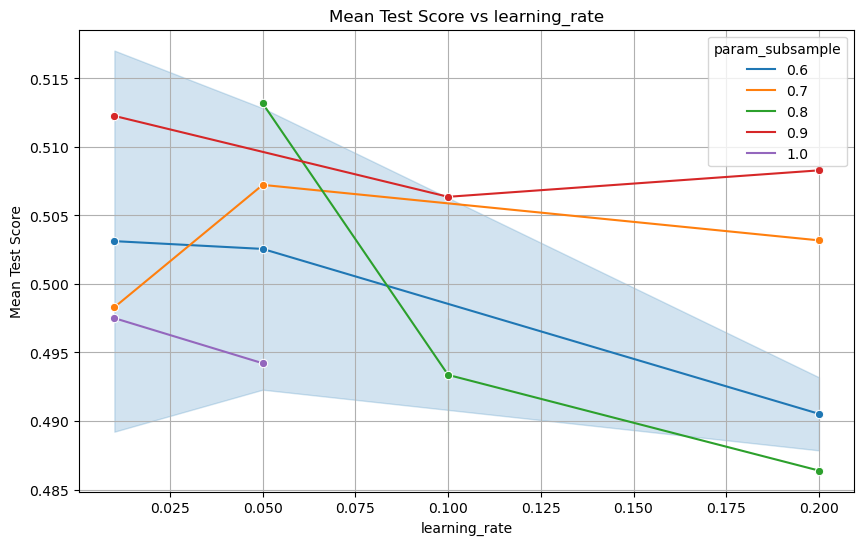

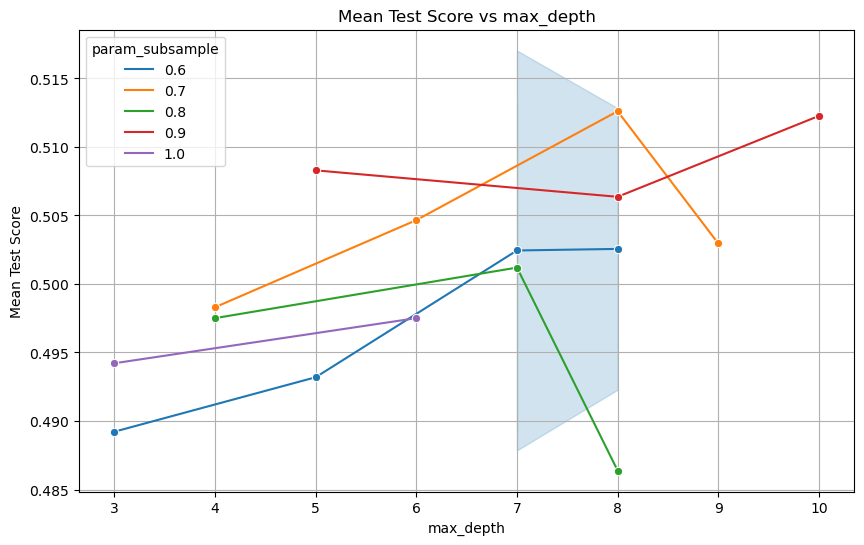

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.DataFrame(random_search.cv_results_)

# --- n_estimators vs mean_test_score (hue=max_depth) ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=results_df,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    palette= 'tab10',
    marker='o'
)
plt.title("Mean Test Score vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()

# --- learning_rate vs mean_test_score (hue=subsample) ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=results_df,
    x='param_learning_rate',
    y='mean_test_score',
    hue='param_subsample',
    palette= 'tab10',
    marker='o'
)
plt.title("Mean Test Score vs learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()

# --- max_depth vs mean_test_score (hue=subsample) ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=results_df,
    x='param_max_depth',
    y='mean_test_score',
    hue='param_subsample',
    palette= 'tab10',
    marker='o'
)
plt.title("Mean Test Score vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb

# === 1. Parameter Grid definieren ===
param_grid = {
    "n_estimators": [50, 100, 200, 500, 1000, 600, 700, 800, 900, 1000],
    "max_depth": [3, 4, 5,6,7,8,9,10],
    "learning_rate": [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.3],
    "subsample": [0.8, 0.6, 0.7, 0.5, 1.0]
}

# === 2. XGBoost Modell ===
xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

# === 3. Grid Search ===
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=10,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# === 4. Bestes Modell extrahieren ===
best_model = grid_search.best_estimator_

# === 5. Evaluation auf Test-Set ===
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 6. Confusion Matrix ===
labels_all = [0, 1, 2]  # deine drei Klassen
cm = confusion_matrix(y_test, y_pred, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.show()


NameError: name 'X_train_res' is not defined